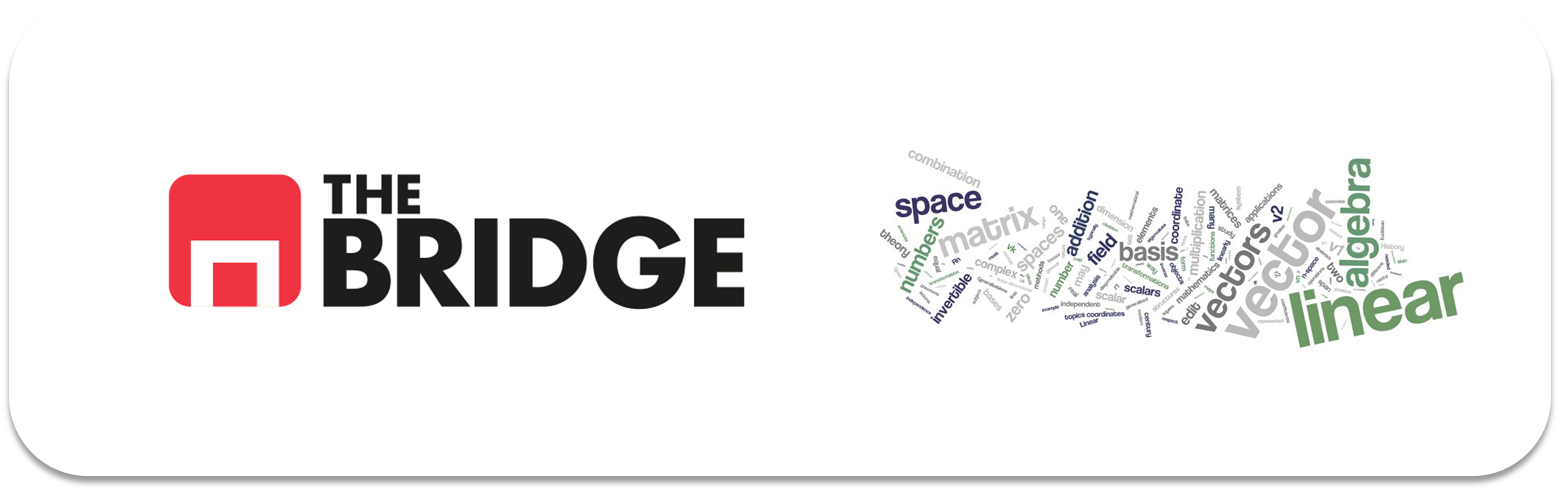

# Clases Extraescolares: Matrices

Empezamos con las matrices y las operaciones más básicas que podemos hacer con ellas. Pero antes como en las sesiones anteriores veamos como evoluciona la situación de Dena Aidone.


## Contenidos

* [Los problemas crecen](#Los-problemas-crecen)  

* [Aparecen las matrices](#Aparecen-las-matrices)  

* [Escalares, vectores y matrices](#Escalares,-vectores-y-matrices)  

* [Resolviendo el nuevo problema (con matrices)](#Resolviendo-el-nuevo-problema-(con-matrices))  



### Los problemas crecen  

[al indice](#Contenidos)  



La dirección de la EdTech está muy contenta, pero, como ya suponía Dena, no sólo quiere asignar a cada alumno a una clase extraescolar en exclusiva. Prefiere repartir las horas entre las tres opciones en vez de concentrarlas todas en una.

En concreto, quieren que Dena Aidone asigne las horas de cada alumno y rellene la tabla siguiente, repartiendo en grupos de 2 horas, 1 hora y 0.5 horas por alummno.

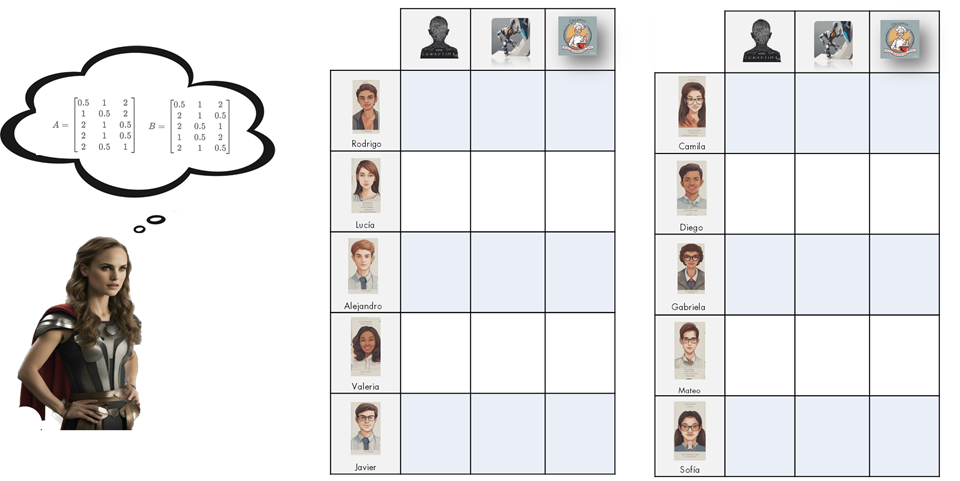

Cualquier ser humano, no Data Scientist y quizás matemático, vería la tarea como eso "completar" dos tablas [de las que podemos llevarnos al excel], pero Dena Aidone es data scientis y no puede evitar, ver **las tablas como matrices**, conjuntos de vectores apilados bien horizontalmente o bien verticalmente.

¿Y qué es una matriz?

### Aparecen las matrices  

[al indice](#Contenidos)  



Una matriz `n × k` es una agrupación rectangular de números con n filas y k columnas; se representa de la siguiente forma:

$$\begin{split}A =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1k} \\
    a_{21} & a_{22} & \cdots & a_{2k} \\
    \vdots & \vdots &  & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nk}
\end{array}
\right]\end{split}$$

En la matriz A, el símbolo $a_{nk}$ representa el elemento  n-ésimo de la fila en la k-ésima columna. La matriz A también puede ser llamada un vector si cualquiera de n o k son iguales a 1. En el caso de n=1, A se llama un vector fila, mientras que en el caso de k=1 se denomina un vector columna. Por lo tanto otra forma de ver una matriz es como una "colección" (si una lista, por ejemplo) de n vectores horizontales o una colección de k vectores verticales. Y como los vectores no son más que listas, básicamente podemos tratar las matrices como listas de listas.


En definitiva, la **tabla** de toda la vida con n filas y k columnas :-). Pero **rellena con números**, lo que nos va a permitir otorgarle una serie de **propiedades y operaciones matemáticas** que nos vendrán muy bien para nuestra tarea de Data Scientist.

Por cierto al combinado de valores n y k se les denominad dimensión de la matriz y se suele enunciar como "n por k" (n * k), siempre el número de fila primero y luego el número de columnas.

### Escalares, vectores y matrices  

[al indice](#Contenidos)  



Antes de seguir, un pequeño recuerdo terminológico:

* Escalar: Un número a secas
* Un vector: Una serie, lista o colección ordenada de números
* Matriz: Una serie o lista ordenada de vectores

Gráficamente:



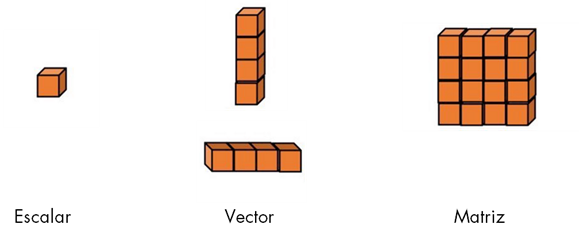

In [ ]:
escalar = 5
vector = [1,2,4]
matriz = [[1,2,4],
          [3,5,6]]

### Resolviendo el nuevo problema (con matrices)  

[al indice](#Contenidos)  



Vamos a resolver el problema, no exactamente con matrices, pero si devolviendo el resultado en una matriz, porque la profesora se teme que vendrán más peticiones y sabe que así le será mejor acometerlas.
Al lío y ¿cómo resolvemos el asunto? Recuerda: Ahora hay que asignar horas a cada alumno y a cada clase...

Pues sencillo, asignaremos 2 horas a la clase principal, 1 hora a la clase secundaria y 0.5 a la menos prioritaria.

Y para ello vamos a usar todo lo que ya programamos en sesiones anteriores.

In [2]:
alumnos_aidone = {
    "Rodrigo": [5,4],
    'Lucia': [2, -3],
    'Alejandro': [3, 5],
    'Valeria': [-5, 4],
    'Javier': [0, -1],
    'Camila': [3, 2],
    'Diego': [-1, 1],
    'Gabriela': [5, -2],
    'Mateo': [-5, 3],
    'Sofía': [-5, 1]
}

In [3]:
import math

def distancia_2d(vec1, vec2, precision = 2): # Esperamos vectores de 2 dimensiones, es decir "listas" con longitud 2
    suma = 0
    for indice_componente in range(2): # 2 por ser la cardinalidad (número de componentes del vector)
        suma += (vec1[indice_componente] - vec2[indice_componente])**2
    distancia = math.sqrt(suma)
    distancia = round(distancia, precision)
    return distancia

In [ ]:
alumnos_ref = ["Rodrigo","Gabriela","Mateo"]
curso_asignado = ["CAI","ER","NMPC"]
diccionario_reparto = {}

for alumno, vector in alumnos_aidone.items():
    # Recorremos el diccionario donde tenemos el vector que caracteriza cada alumno
    distancia_minima = 99999999 # Por ahora cualquier distancia a los alumons de referencia es buena
    indice_distancia_minima = -1
    diccionario_reparto[alumno] = []
    for indice_curso,alumno_ref in enumerate(alumnos_ref):
        vec_ref = alumnos_aidone[alumno_ref]
        distancia = distancia_2d(vector, vec_ref, 1)
        if distancia < distancia_minima: # Preguntale por lo que pasa aquí por no tener un igual
            distancia_minima = distancia
            indice_distancia_minima = indice_curso
        diccionario_reparto[alumno].append(distancia) # tiene una entrada por cada alumno 
        #y en cada entrada lo que tiene es la lista con las distancias ordenadas
        #diccionario_reparto[alumno]["curso_elegido"] = curso_asignado[indice_distancia_minima] NO ES NECESARIO para esta parte
    

Vamos a trabajar a partir del diccionario de reparto (*diccionario_reparto*) y creando una matriz para guardar el resultado. 
Recordemos que diccionario_reparto tiene una entrada por alumnos con las distancias a cada "curso" (a cada alumno de referencia)


In [ ]:
diccionario_reparto

# Rodrigo distancia a Rodrigo: 0.0, y, z
# Gabriela distancia a Gabriela: x, 0.0, z
# Mateo distancia a Mateo: x, y, 0.0

{'Rodrigo': [0.0, 6.0, 10.0],
 'Lucia': [7.6, 3.2, 9.2],
 'Alejandro': [2.2, 7.3, 8.2],
 'Valeria': [10.0, 11.7, 1.0],
 'Javier': [7.1, 5.1, 6.4],
 'Camila': [2.8, 4.5, 8.1],
 'Diego': [6.7, 6.7, 4.5],
 'Gabriela': [6.0, 0.0, 11.2],
 'Mateo': [10.0, 11.2, 0.0],
 'Sofía': [10.4, 10.4, 2.0]}

Nuestro algoritmo irá alumno por alumno comprobando para cada curso que distancia le corresponde si es la máxima le otorgará 0.5 horas, si es la mínima 2 y si no cumple ninguna de las dos condiciones le otorgorá 1. 

Veámoslo, como repaso de programación, con Javier:

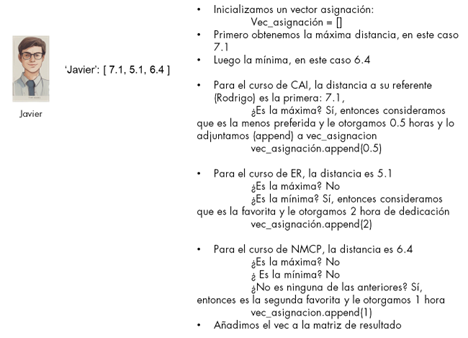

#Error la distancia mínima es 5.1

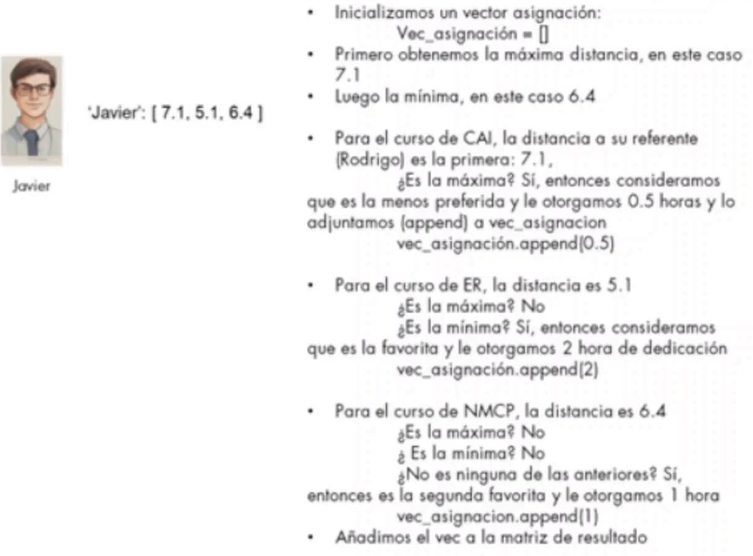

Lo anterior es lo que se llama pseudocódigo y nos sirve para hacer una codificación casi directa

In [7]:
matriz_resultado = []

for alumno, distancias in diccionario_reparto.items():
    vec_asignacion = []
    maximo = max(distancias)
    minimo = min(distancias)
    maximo_asignado = False   
    minimo_asignado = False   # pq la distancia del vector de algún alumno puede ser la misma
    # en la comparación con más de un alumno de referencia (ej. Sofia [10.4, 10.4, 2.0]), 
    # entonces para evitar que se les asigne la misma cantidad de horas
    # hacemos un recuento de si ya hemos encontrado el máximo y el mínimo.
    # Al primero que encontremos que sea la máxima (ej. Sofía ese primer 10.4) a ese le asignamos el máximo,
    # y a la siguiente le damos la de segunda prioridad.
    for indice, curso in enumerate(curso_asignado):
        distancia = distancias[indice]
        if distancia == maximo and not maximo_asignado:
            vec_asignacion.append(0.5)
            maximo_asignado = True
        elif distancia == minimo and not minimo_asignado:
            vec_asignacion.append(2)
            minimo_asignado = True
        else:
            vec_asignacion.append(1)
    matriz_resultado.append(vec_asignacion)

matriz_resultado

[[2, 1, 0.5],
 [1, 2, 0.5],
 [2, 1, 0.5],
 [1, 0.5, 2],
 [0.5, 2, 1],
 [2, 1, 0.5],
 [0.5, 1, 2],
 [1, 2, 0.5],
 [1, 0.5, 2],
 [0.5, 1, 2]]

Gráficamente:

$$Asignacion =\begin{bmatrix}2&1&0.5\\1&2&0.5\\2&1&0.5\\1&0.5&2\\0.5&2&1\\2&1&0.5\\0.5&1&2\\1&2&0.5\\1&0.5&2\\0.5&1&2\end{bmatrix}$$

Ahí tenemos nuestra matriz, como una lista de vectores de 3 dimensiones cada una corresponde a la asignación de horas de cada alumno

Accedamos por ejemplo a las horas que vamos a asignarle a Gabriela al curso de cocina (necesitamos el índice de fila que corresponde a Gabriela)

In [ ]:

# Mirando el diccionario y curso_asignado, vemos que Gabriela es la 8ª fila y curso de cocina es 3ª columna
# Recuerda que empiezas a contar en 0
matriz_resultado[7][2] 

0.5

Intenta acceder a diferentes posiciones por ejemplo las horas de CAI que le otorgamos a Rodrigo, que deberían ser las máximas, las horas de RE de Javier, etc

In [10]:
# Rodrigo, CAI (empezando por 0) : fila 0, columna 0
matriz_resultado[0][0]

2

In [11]:
# Javier, RE (empezando por 0) : fila 4, 1
matriz_resultado[4][1]

2